In [1]:
# Load data
import pickle

pickle_in = open("optimality_parsed_results.pickle","rb")
results = pickle.load(pickle_in)

In [24]:
# Load pytorch 

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [25]:
sns.set_style('ticks')

In [3]:
# Experimental parameters
D = 6.370
Dp = 3.136-D
T0 = .16

In [9]:
results['AL8']['rt_by_session'].keys()

['AL8_170807.mwk',
 'AL8_170816.mwk',
 'AL8_170726.mwk',
 'AL8_170811.mwk',
 'AL8_170801.mwk',
 'AL8_170725.mwk',
 'AL8_170817.mwk',
 'AL8_170724.mwk',
 'AL8_170809.mwk',
 'AL8_170801b.mwk',
 'AL8_170803.mwk',
 'AL8_170803b.mwk',
 'AL8_170808.mwk',
 'AL8_170814.mwk',
 'AL8_170728.mwk',
 'AL8_170727.mwk',
 'AL8_170802.mwk',
 'AL8_170812.mwk',
 'AL8_170721b.mwk',
 'AL8_170721.mwk',
 'AL8_170815.mwk',
 'AL8_170804b.mwk',
 'AL8_170804.mwk',
 'AL8_170810.mwk']

0 AK1
1 AK10
2 AK11
3 AK12
4 AK2
5 AK3
6 AK4
7 AK5
8 AK6
9 AK7
10 AK9
11 AL1
12 AL10
13 AL11
14 AL12
15 AL13
16 AL14
17 AL15
18 AL16
19 AL2
20 AL3
21 AL4
22 AL5
23 AL6
24 AL7
25 AL8
26 AL9


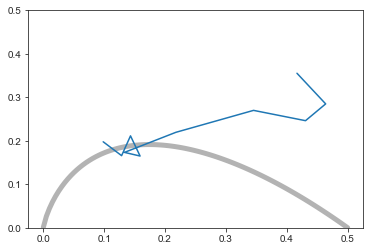

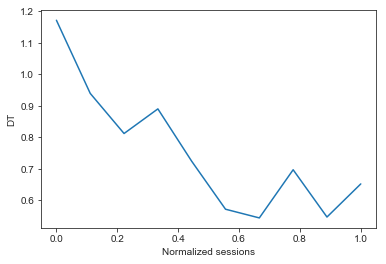

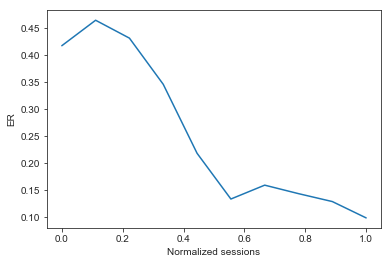

In [27]:
# Marshall data (RT and ER)

use_average = False # Fit to average of all animals
rat_to_fit = 16 # Which animal to fit if use_average=False

rats = results.keys()
stat = 'avg_rt_by_session'
stat2 = 'pct_correct_by_session'
num_points = 10
sess = np.linspace(0,1,num_points)
num_rats = len(rats)
DTmat = np.zeros((num_rats,num_points))
ERmat = np.zeros((num_rats,num_points))
for i,rat in enumerate(sorted(rats)):
    print i, rat
    DT_dat = [float(results[rat][stat][s]/1000.-T0) for s in sorted(results[rat][stat])]
    ER_dat = [1.-results[rat][stat2][s] for s in sorted(results[rat][stat2])]
    num_sessions_dat = len(DT_dat)
    sess_dat = np.linspace(0,1,num_sessions_dat)
    DTmat[i,:] = np.interp(sess,sess_dat,DT_dat)
    ERmat[i,:] = np.interp(sess,sess_dat,ER_dat)
    #plt.plot(DT_dat)
#plt.show()
    #plt.plot(sess,DTmat[i,:])

if use_average:
    DT_dat = np.mean(DTmat,axis=0)
    ER_dat = np.mean(ERmat,axis=0)
else:
    DT_dat = DTmat[rat_to_fit,:]
    ER_dat = ERmat[rat_to_fit,:]
    
ER_vec = np.linspace(0.0001,.5-.0001,100)
Dnorm_opc = 1/(1/( ER_vec*np.log( (1-ER_vec)/ER_vec ) ) + 1/ (1 - 2*ER_vec) )
plt.plot(ER_vec,Dnorm_opc,color=(.7, .7, .7),linewidth=5)

plt.plot(ER_dat,DT_dat/(D+T0+Dp))
plt.ylim((0,.5))
plt.show()

plt.plot(sess,DT_dat)
plt.ylabel('DT')
plt.xlabel('Normalized sessions')
plt.show()
plt.plot(sess,ER_dat)
plt.ylabel('ER')
plt.xlabel('Normalized sessions')
plt.show()



0


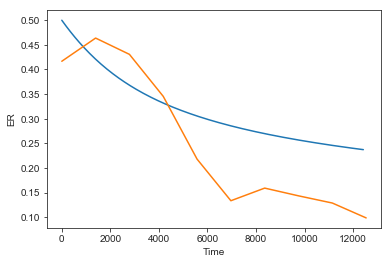

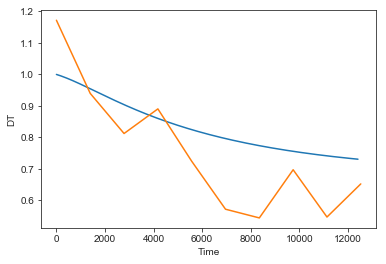

1
2
3
4
5
6
7
8
9
10


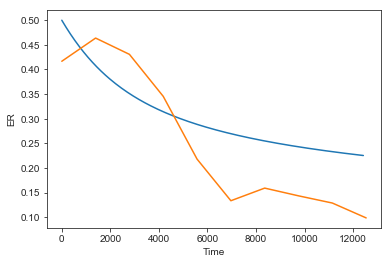

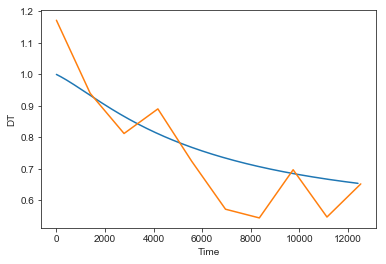

11
12
13
14
15
16
17
18
19
20


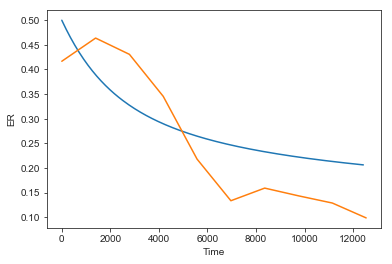

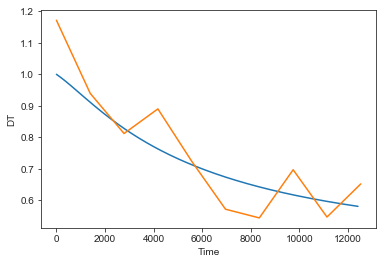

21
22
23
24
25
26
27
28
29
30


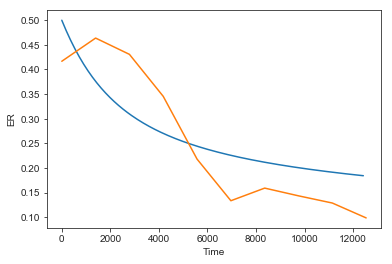

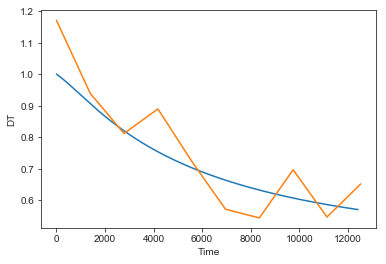

31
32
33
34
35
36
37
38
39
40


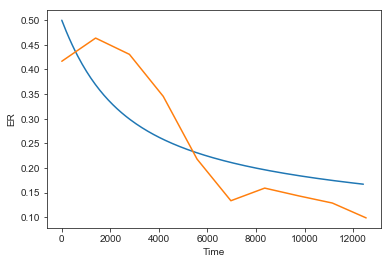

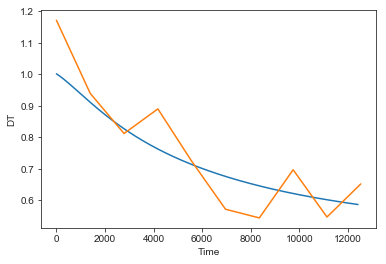

41
42
43
44
45
46
47
48
49
50


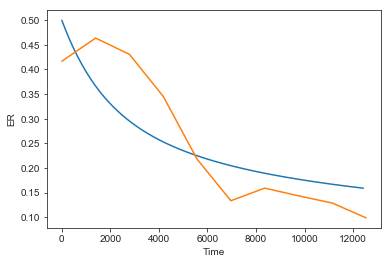

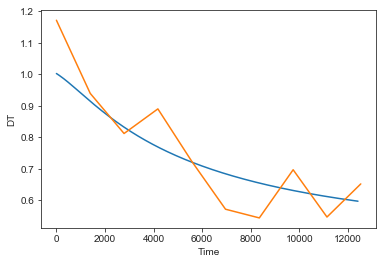

51
52
53
54
55
56
57
58
59
60


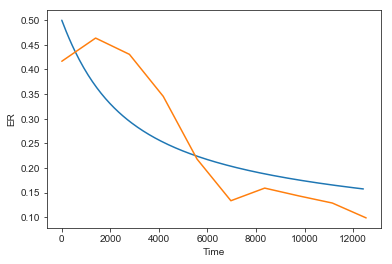

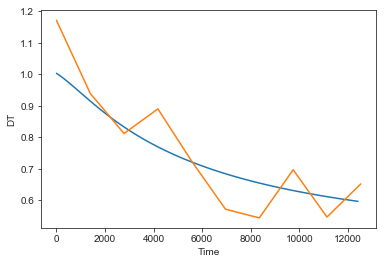

61
62
63
64
65
66
67
68
69
70


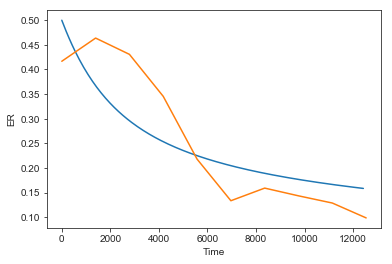

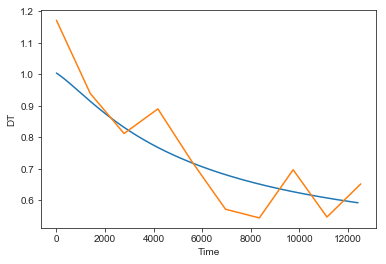

71
72
73
74
75
76
77
78
79
80


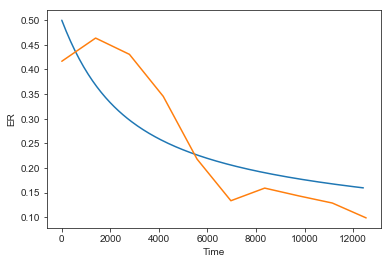

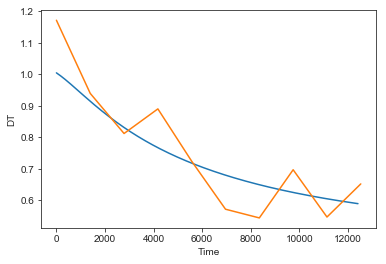

81
82
83
84
85
86
87
88
89
90


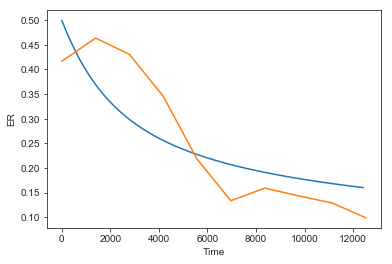

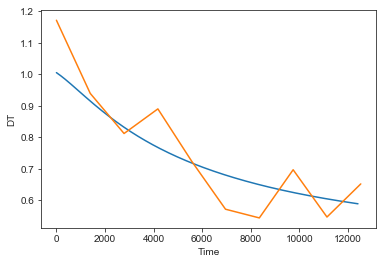

91
92
93
94
95
96
97
98
99
100


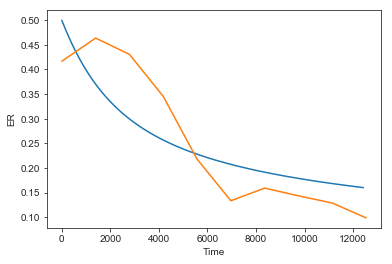

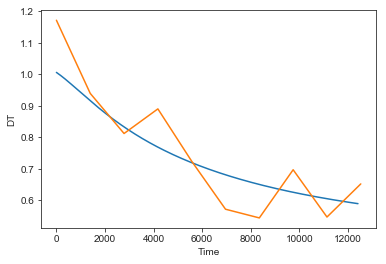

101
102
103
104
105
106
107
108
109
110


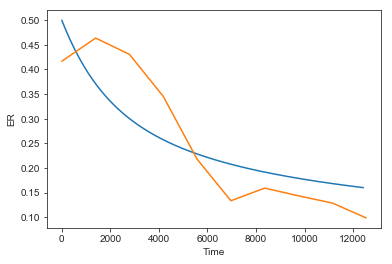

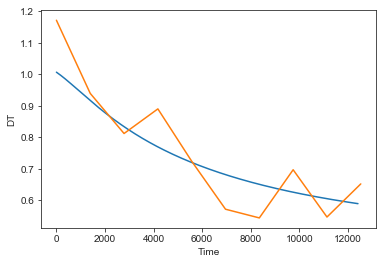

111
112
113
114
115
116
117
118
119
120


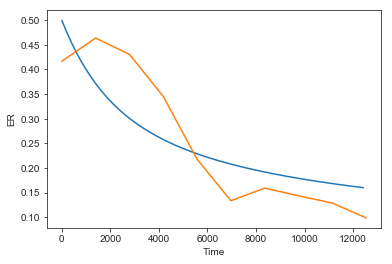

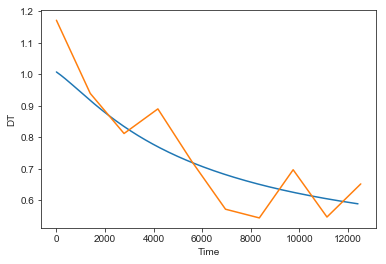

121
122
123
124
125
126
127
128
129
130


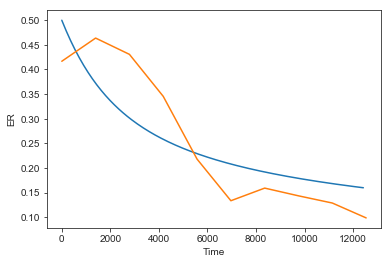

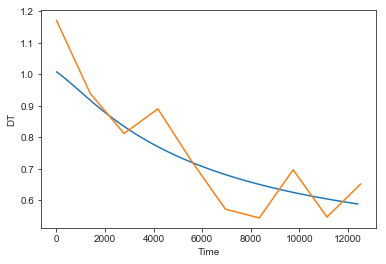

131
132
133
134
135
136
137
138
139
140


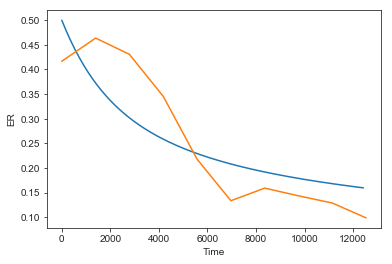

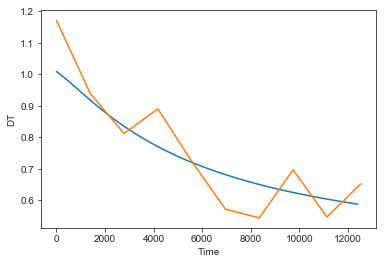

141
142
143
144
145
146
147
148
149
150


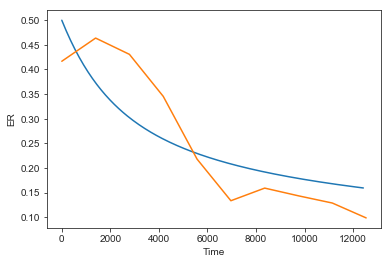

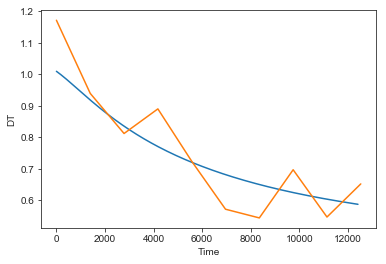

151
152
153
154
155
156
157
158
159
160


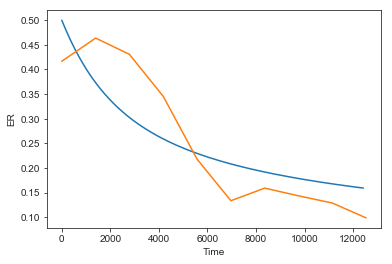

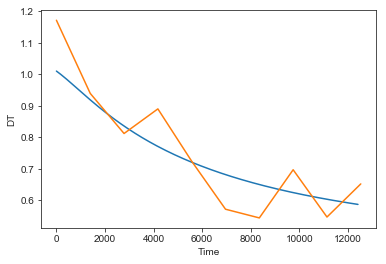

161
162
163
164
165
166
167
168
169
170


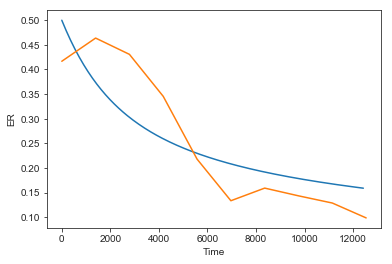

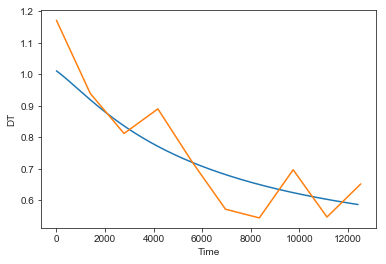

171
172
173
174
175
176
177
178
179
180


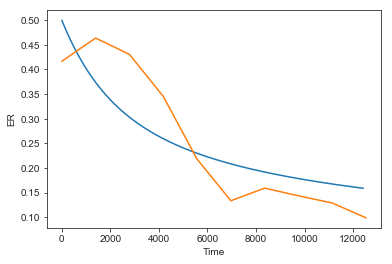

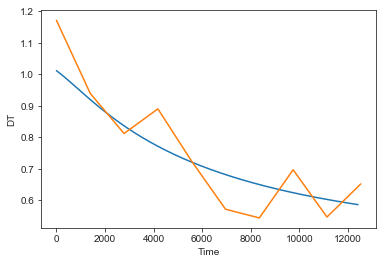

181
182
183
184
185
186
187
188
189
190


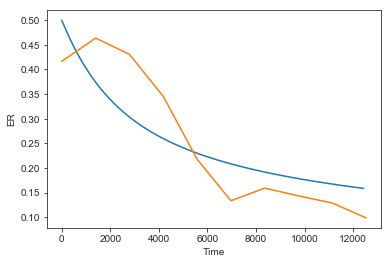

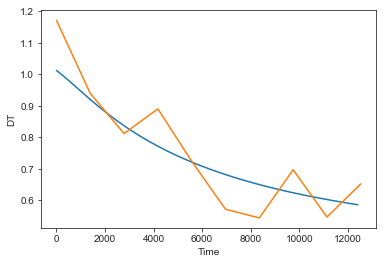

191
192
193
194
195
196
197
198
199
200


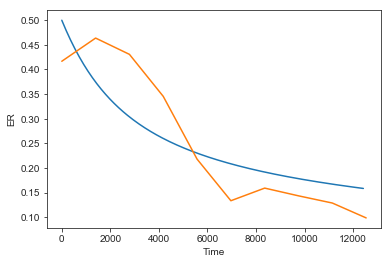

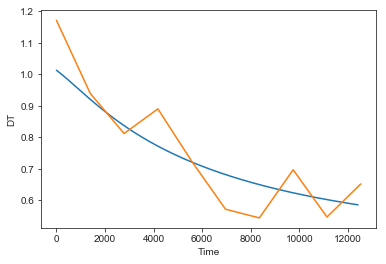

201
202
203
204
205
206
207
208
209
210


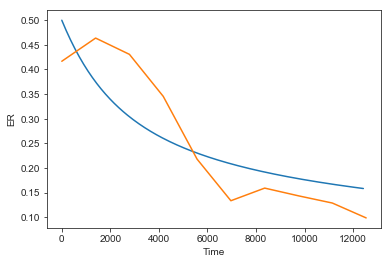

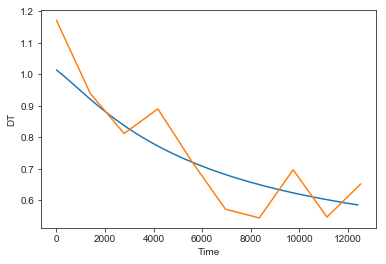

211
212
213
214
215
216
217
218
219
220


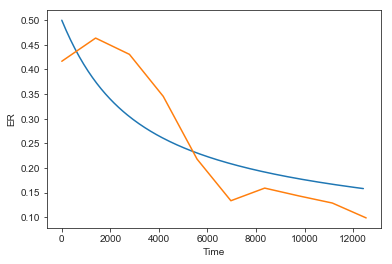

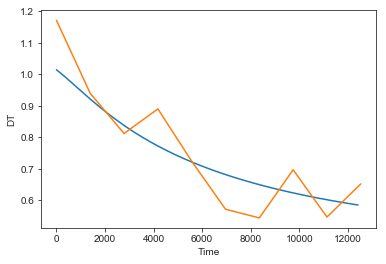

221
222
223
224
225
226
227
228
229
230


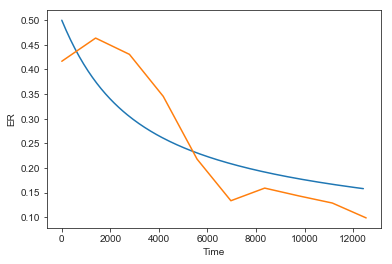

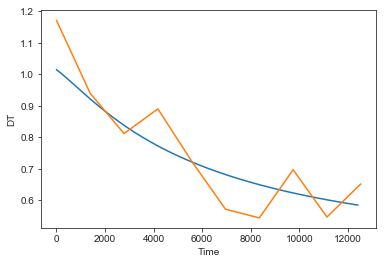

231
232
233
234
235
236
237
238
239
240


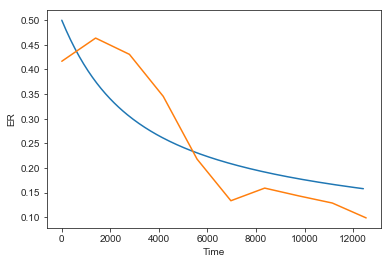

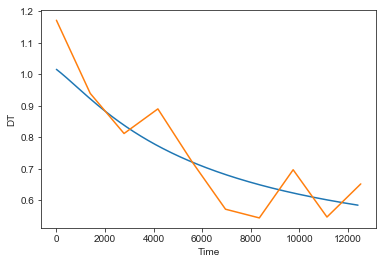

241
242
243
244
245
246
247
248
249
250


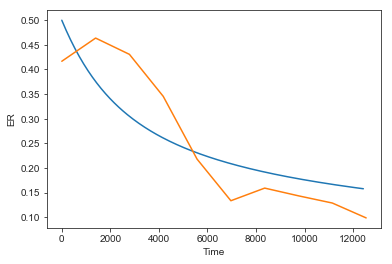

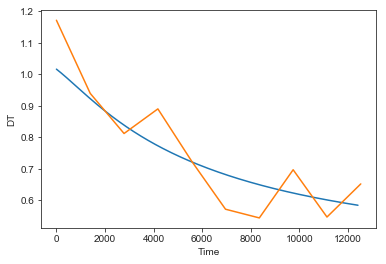

251
252
253
254
255
256
257
258
259
260


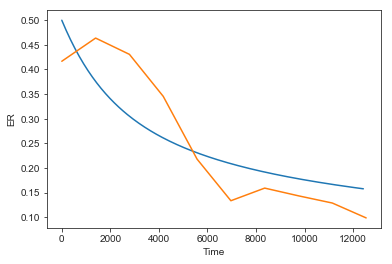

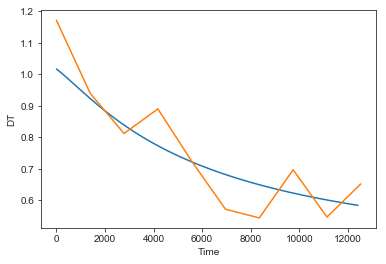

261
262
263
264
265
266
267
268
269
270


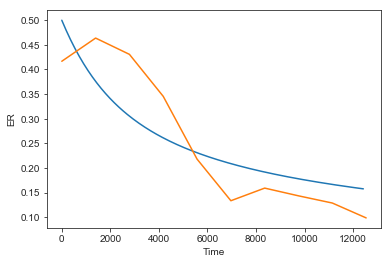

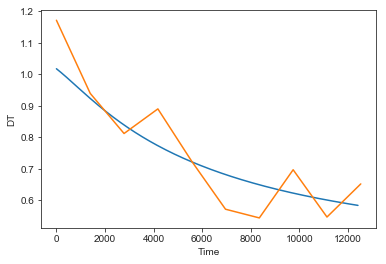

271
272
273
274
275
276
277
278
279
280


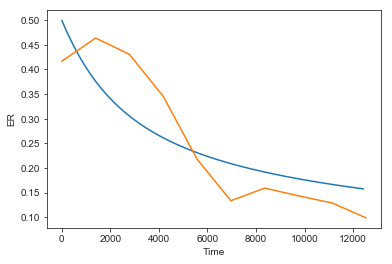

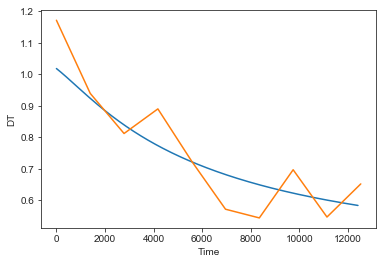

281
282
283
284
285
286
287
288
289
290


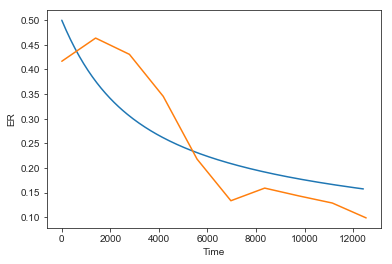

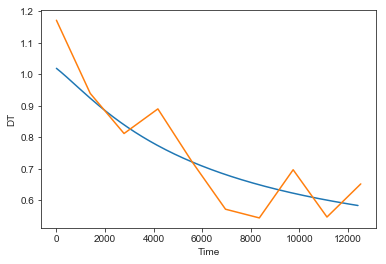

291
292
293
294
295
296
297
298
299
300


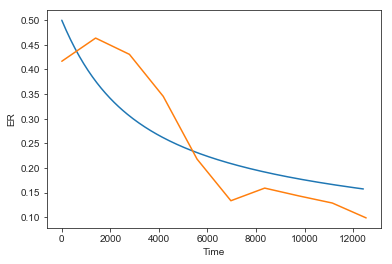

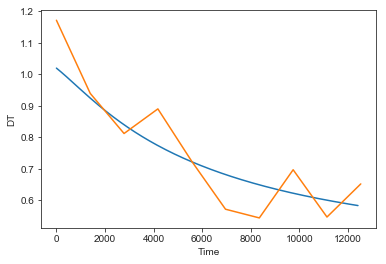

301
302
303
304
305
306
307
308
309
310


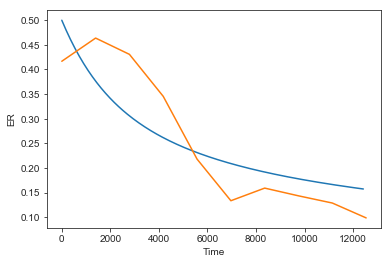

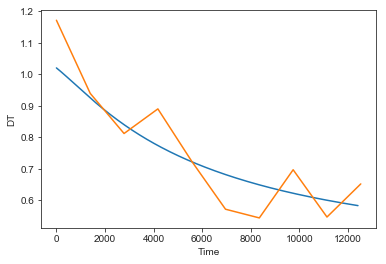

311
312
313
314
315
316
317
318
319
320


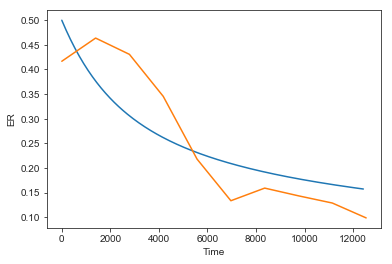

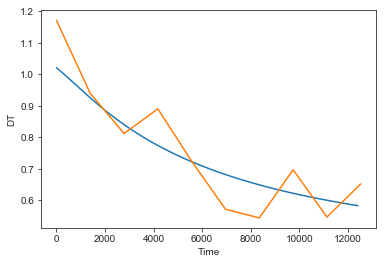

321
322
323
324
325
326
327
328
329
330


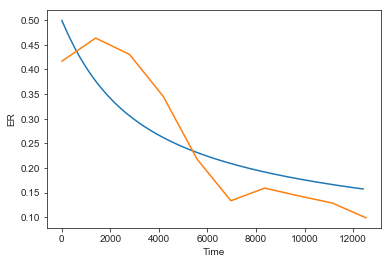

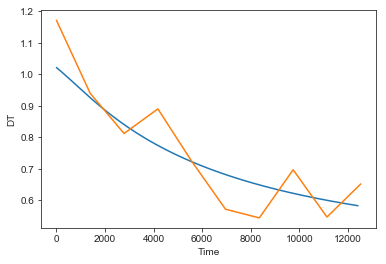

331
332
333
334
335
336
337
338
339
340


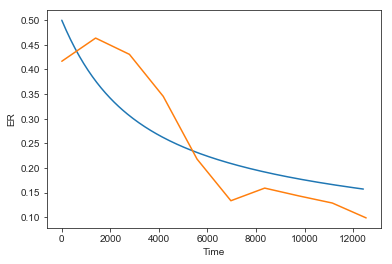

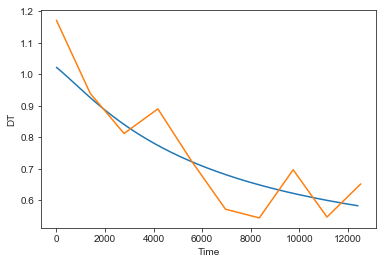

341
342
343
344
345
346
347
348
349
350


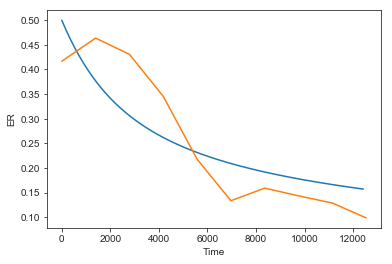

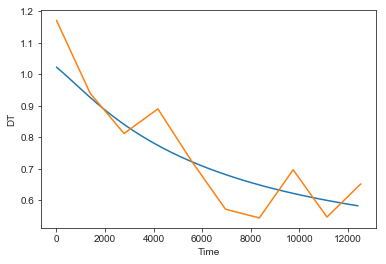

351
352
353
354
355
356
357
358
359
360


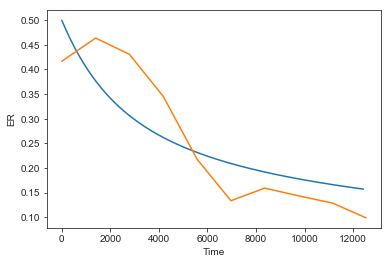

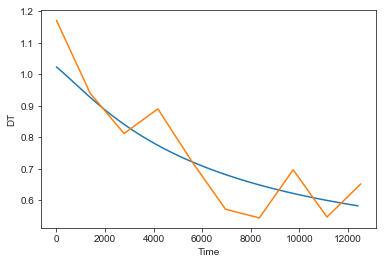

361
362
363
364
365
366
367
368
369
370


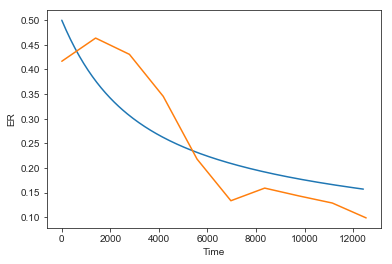

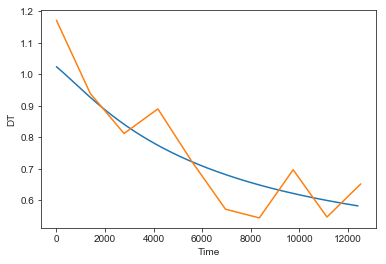

371
372
373
374
375
376
377
378
379
380


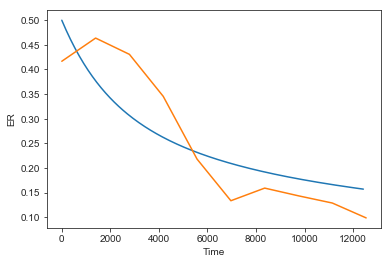

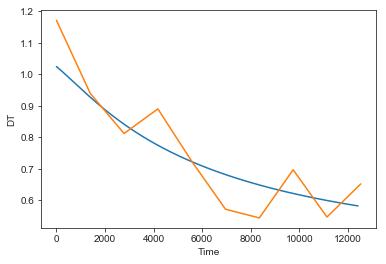

381
382
383
384
385
386
387
388
389
390


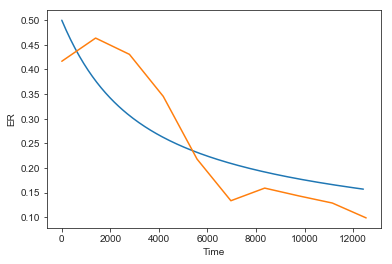

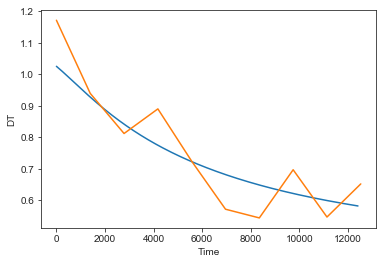

391
392
393
394
395
396
397
398
399
400


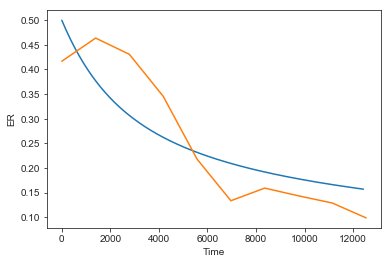

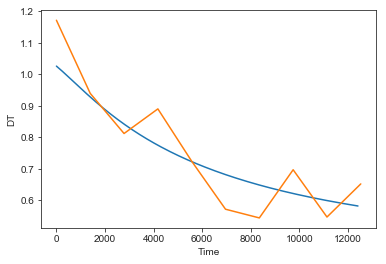

401
402
403
404
405
406
407
408
409
410


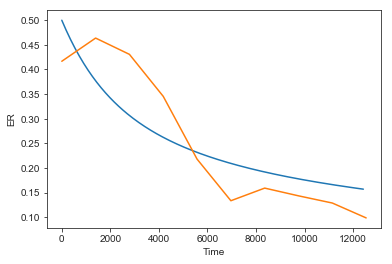

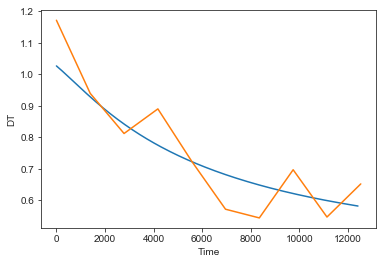

411
412
413
414
415
416
417
418
419
420


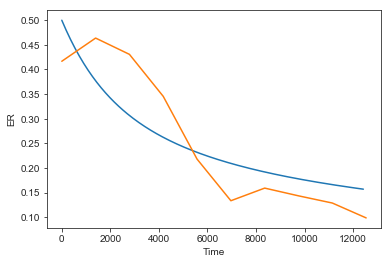

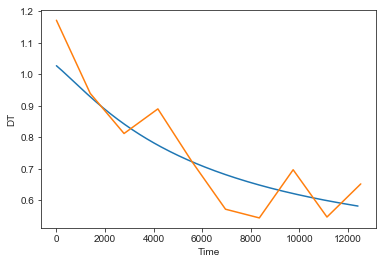

421
422
423
424
425
426
427
428
429
430


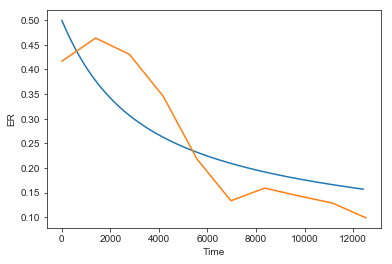

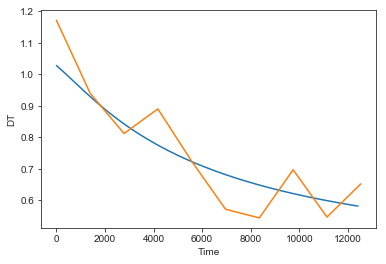

431
432
433
434
435
436
437
438
439
440


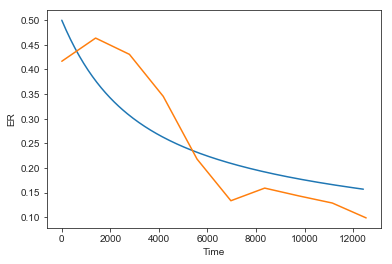

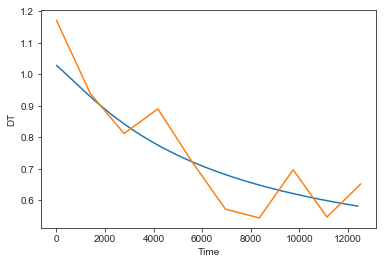

441
442
443
444
445
446
447
448
449
450


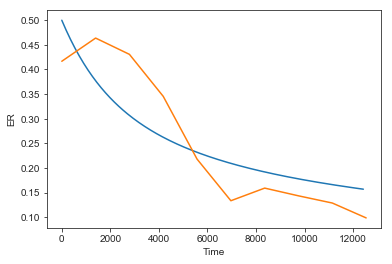

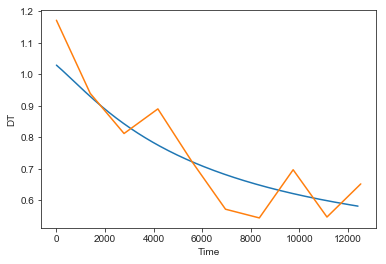

451
452
453
454
455
456
457
458
459
460


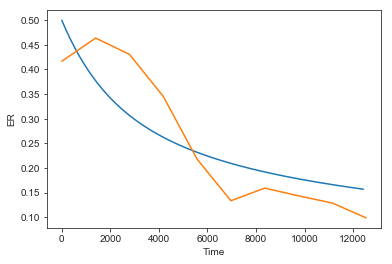

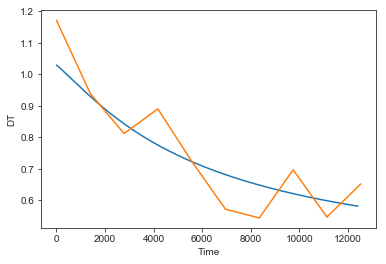

461
462
463
464
465
466
467
468
469
470


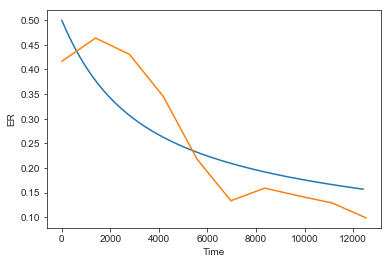

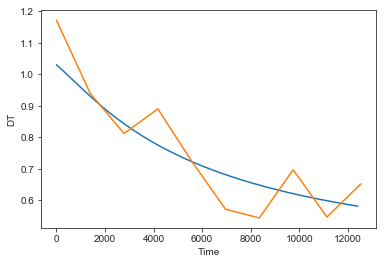

471
472
473
474
475
476
477
478
479
480


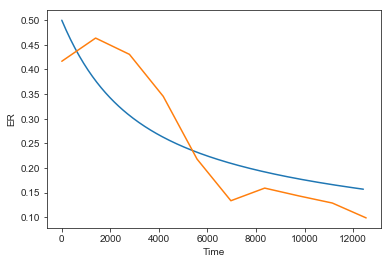

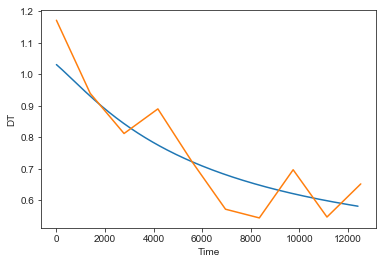

481
482
483
484
485
486
487
488
489
490


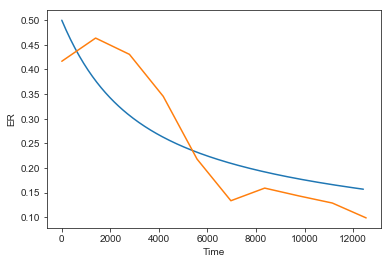

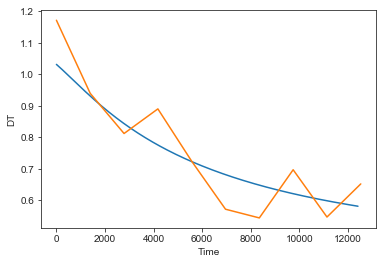

491
492
493
494
495
496
497
498
499
500


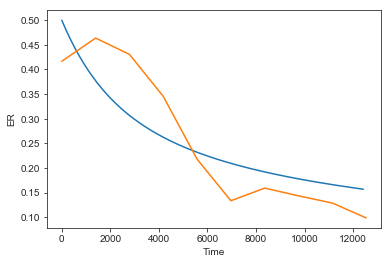

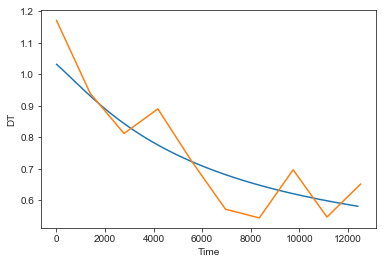

501
502
503
504
505
506
507
508
509
510


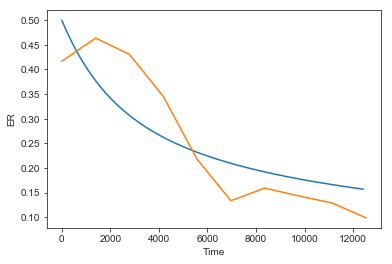

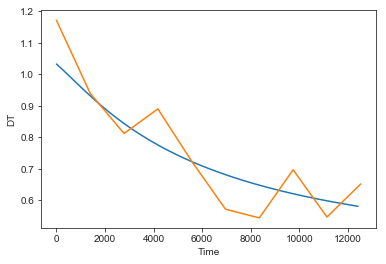

511
512
513
514
515
516
517
518
519
520


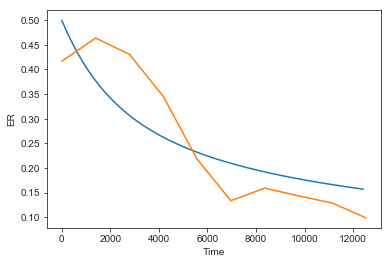

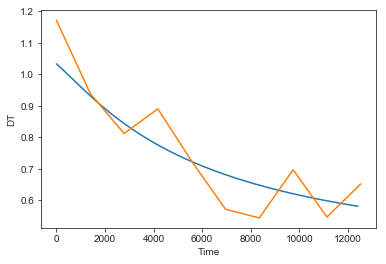

521
522
523
524
525
526
527
528
529
530


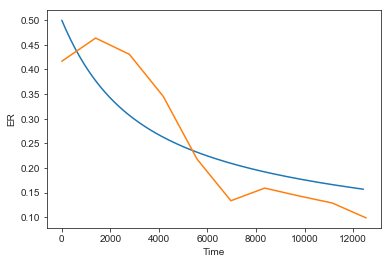

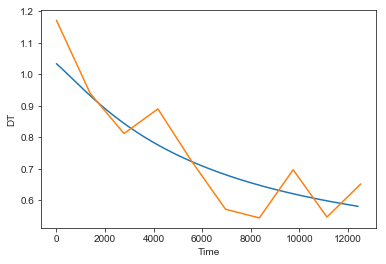

531
532
533
534
535
536
537
538
539
540


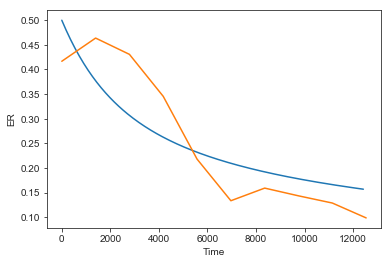

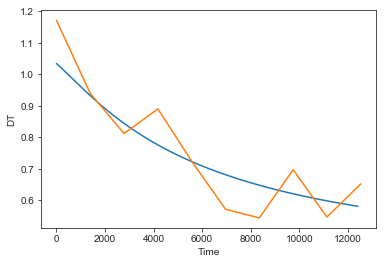

541
542
543
544
545
546
547
548
549
550


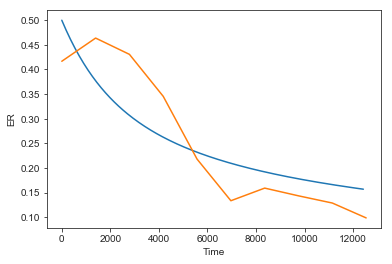

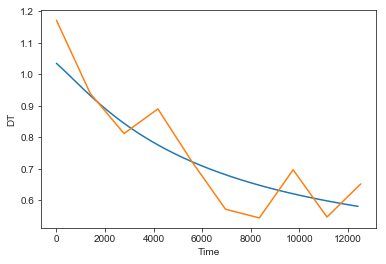

551
552
553
554
555
556
557
558
559
560


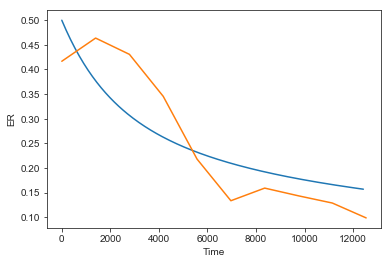

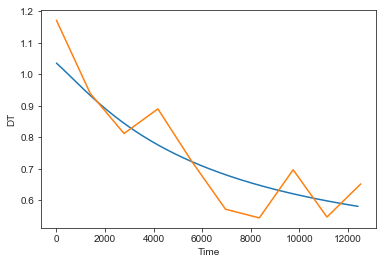

561
562
563
564
565
566
567
568
569
570


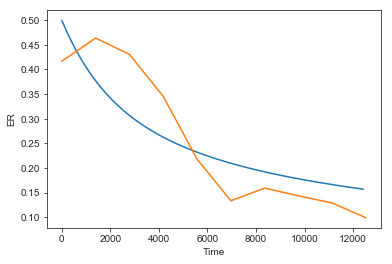

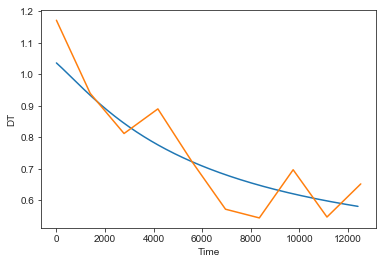

571
572
573
574
575
576
577
578
579
580


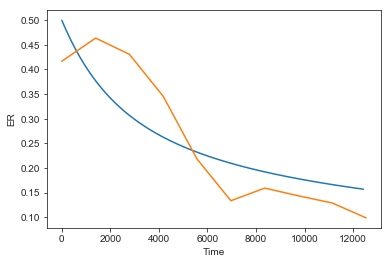

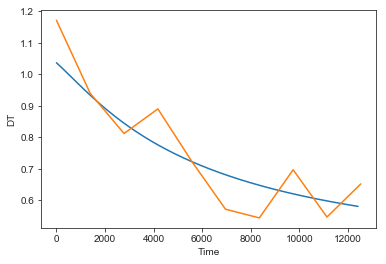

581
582
583
584
585
586
587
588
589
590


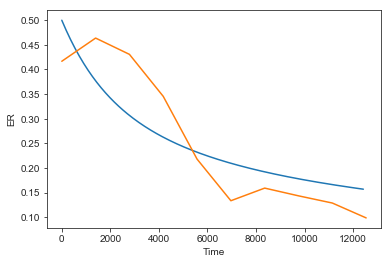

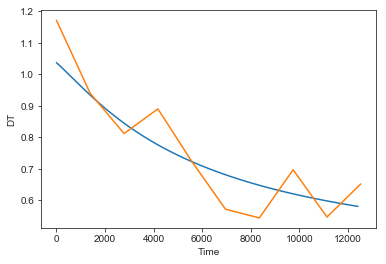

591
592
593
594
595
596
597
598
599
600


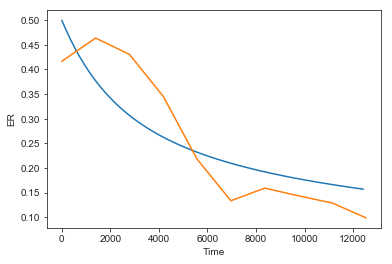

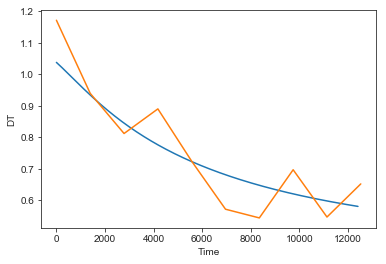

601
602
603
604
605
606
607
608
609
610


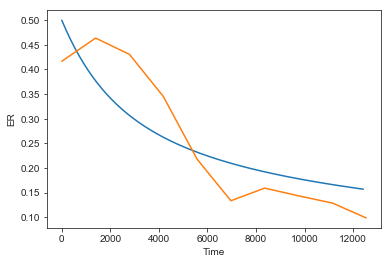

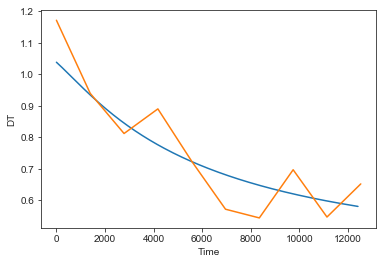

611
612
613
614
615
616
617
618
619
620


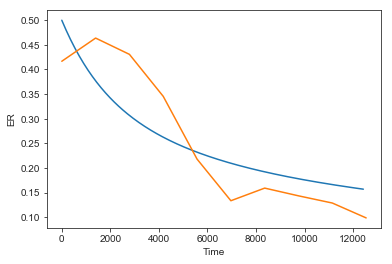

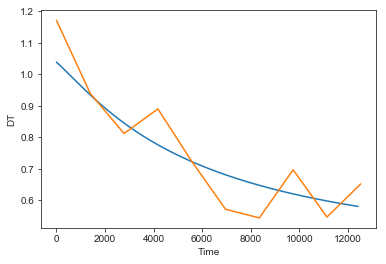

621
622
623
624
625
626
627
628
629
630


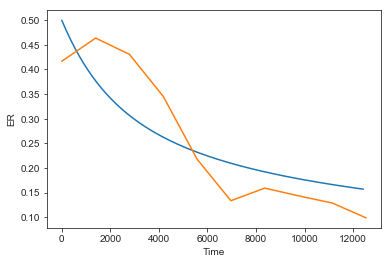

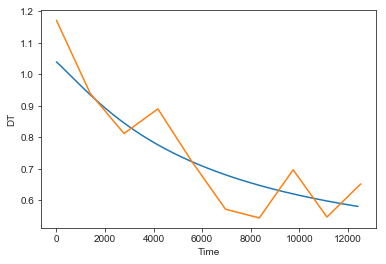

631
632
633
634
635
636
637
638
639
640


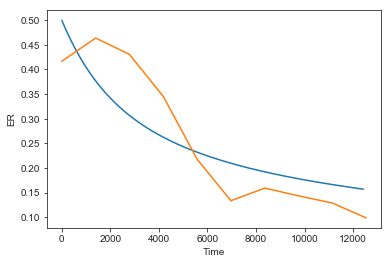

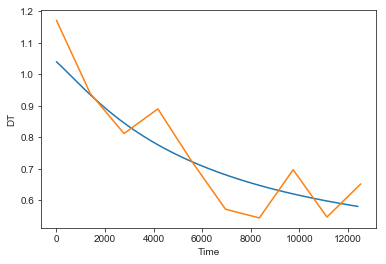

641
642
643
644
645
646
647
648
649
650


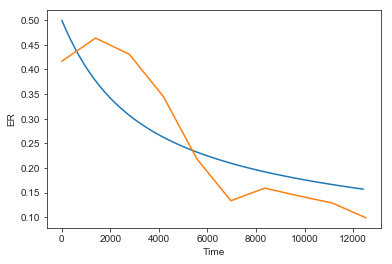

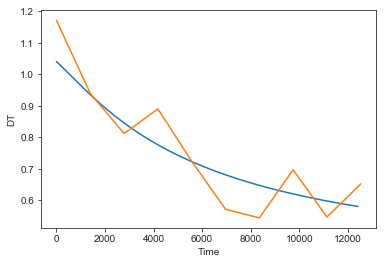

651
652
653
654
655
656
657
658
659
660


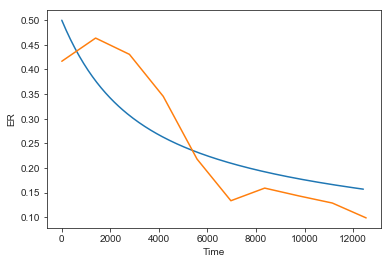

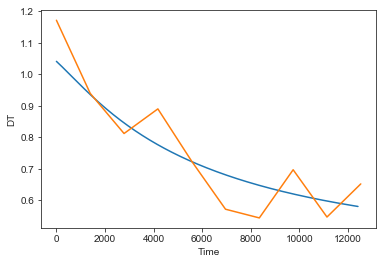

661
662
663
664
665
666
667
668
669
670


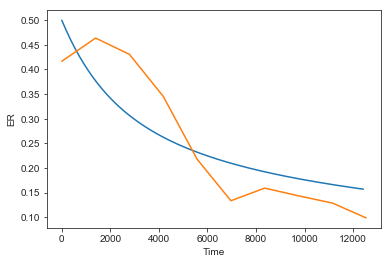

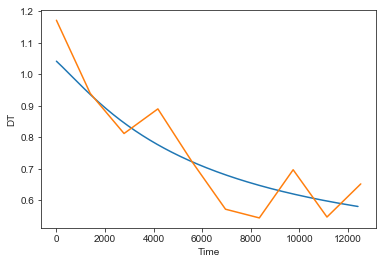

671
672
673
674
675
676
677
678
679
680


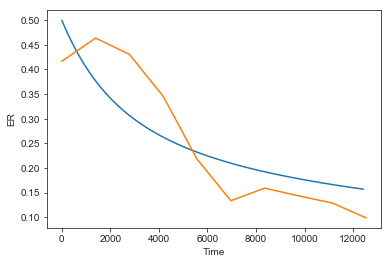

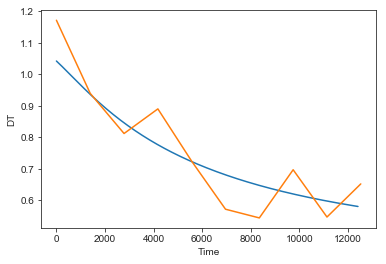

681
682
683
684
685
686
687
688
689
690


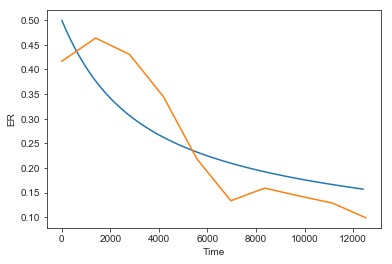

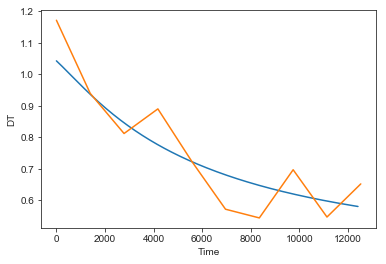

691
692
693
694
695
696
697
698
699
700


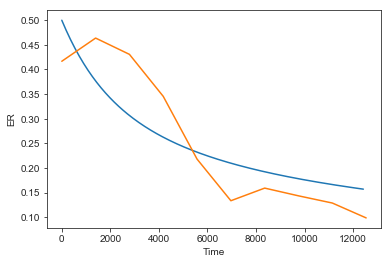

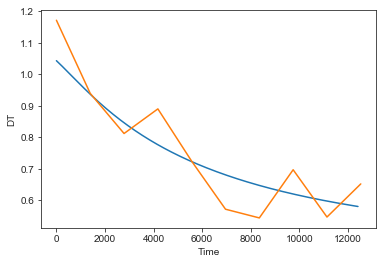

701
702
703
704
705
706
707
708
709
710


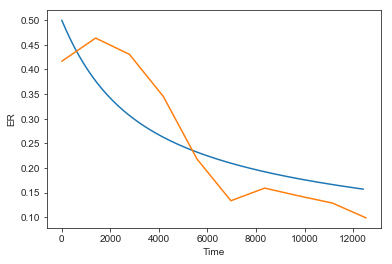

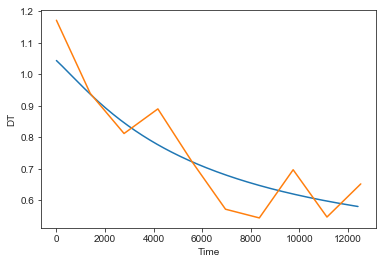

711
712
713
714
715
716
717
718
719
720


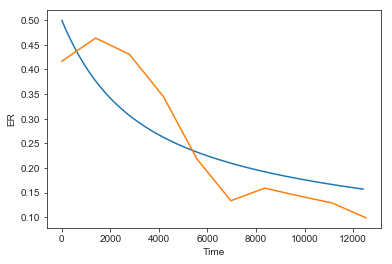

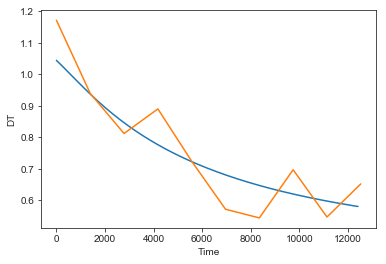

721
722
723
724
725
726
727
728
729
730


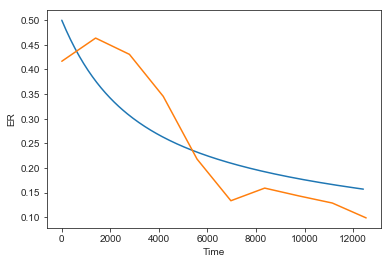

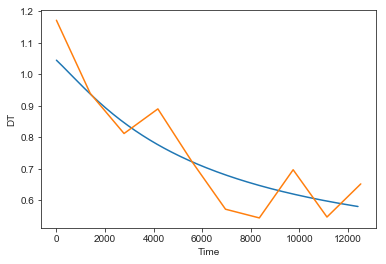

731
732
733
734
735
736
737
738
739
740


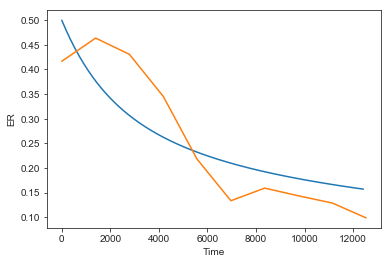

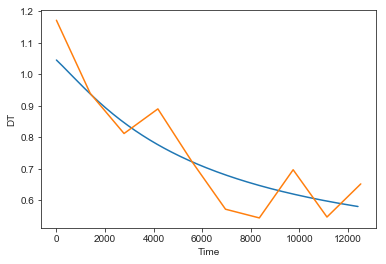

741
742
743
744
745
746
747
748
749
750


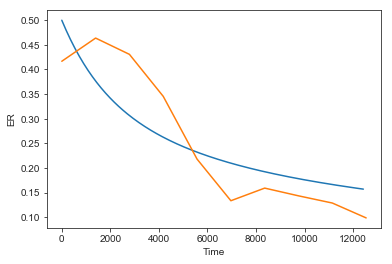

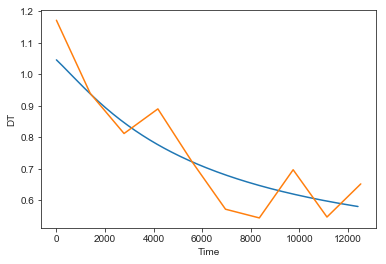

751
752
753
754
755
756
757
758
759
760


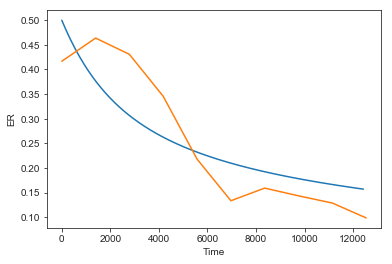

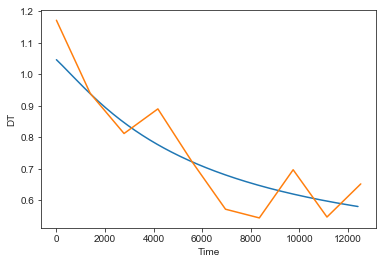

761
762
763
764
765
766
767
768
769
770


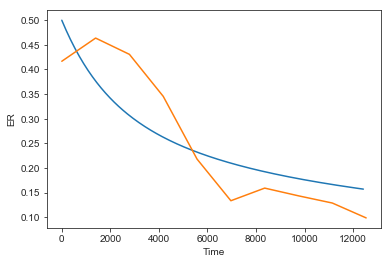

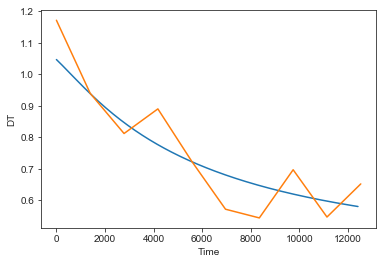

771
772
773
774
775
776
777
778
779
780


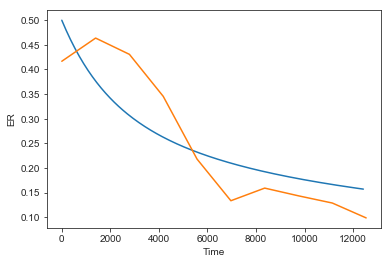

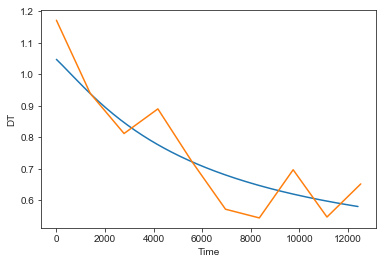

781
782
783
784
785
786
787
788
789
790


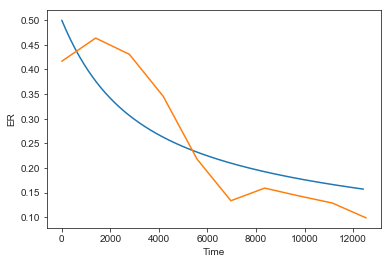

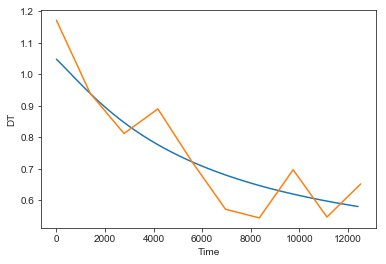

791
792
793
794
795
796
797
798
799
800


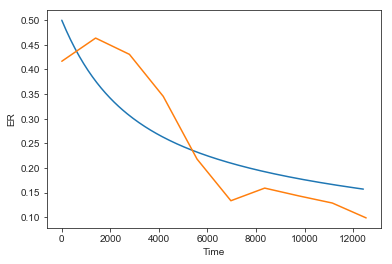

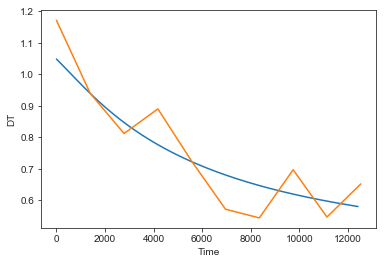

801
802
803
804
805
806
807
808
809
810


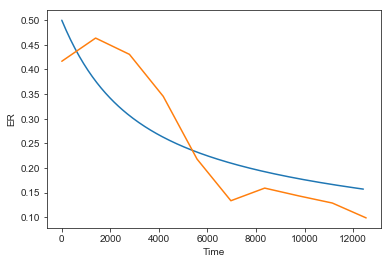

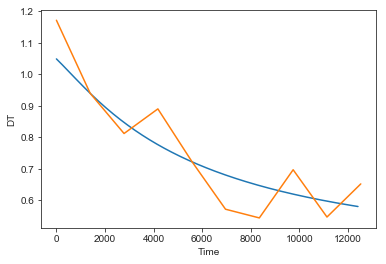

811
812
813
814
815
816
817
818
819
820


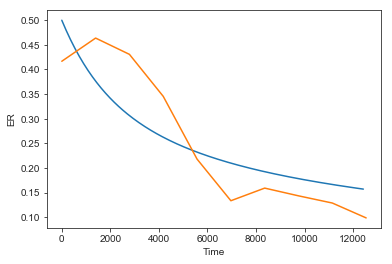

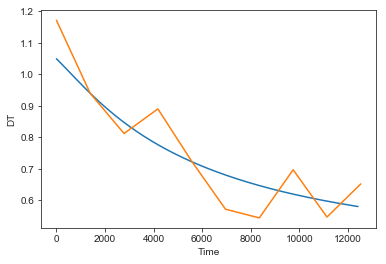

821
822
823
824
825
826
827
828
829
830


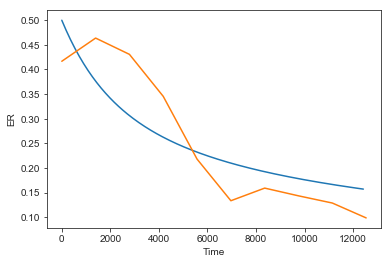

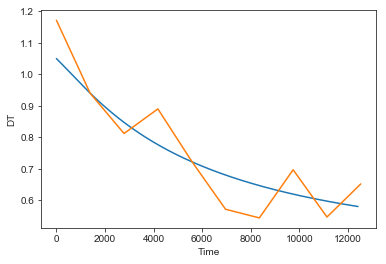

831
832
833
834
835
836
837
838
839
840


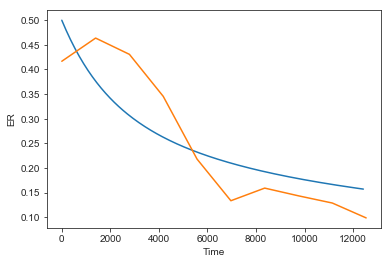

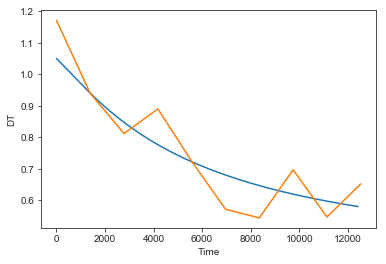

841
842
843
844
845
846
847
848
849
850


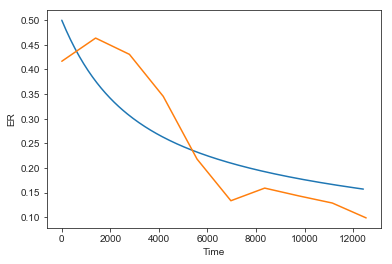

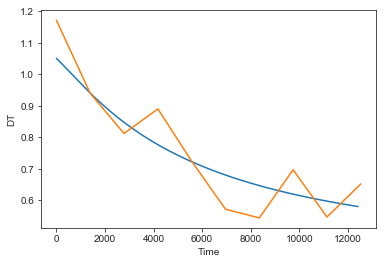

851
852
853
854
855
856
857
858
859
860


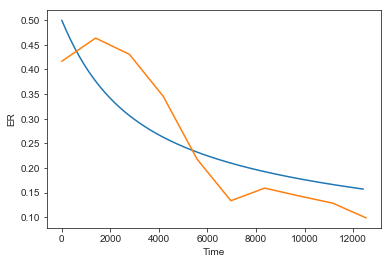

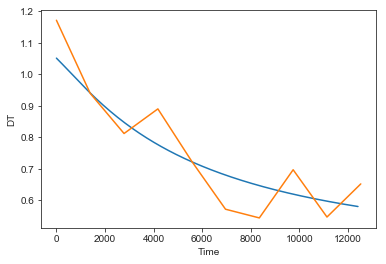

861
862
863
864
865
866
867
868
869
870


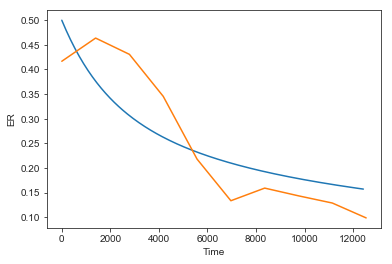

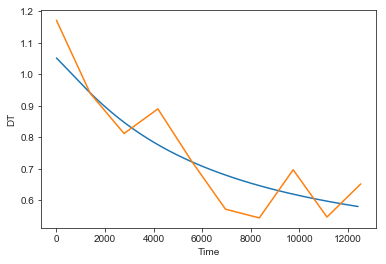

871
872
873
874
875
876
877
878
879
880


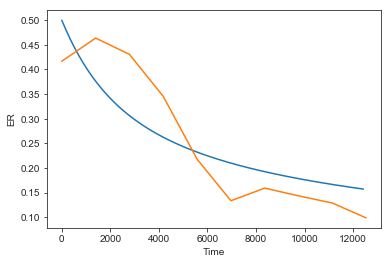

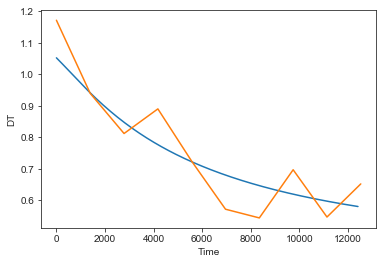

881
882
883
884
885
886
887
888
889
890


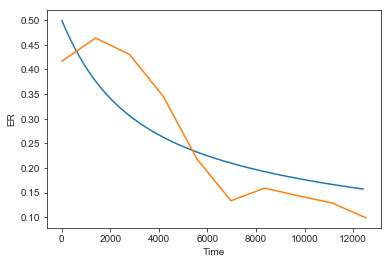

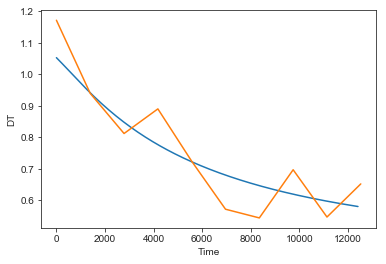

891
892
893
894
895
896
897
898
899
900


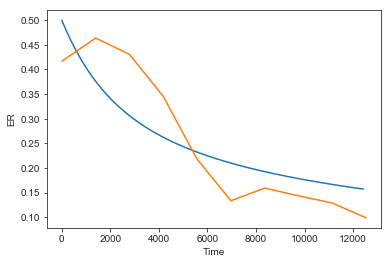

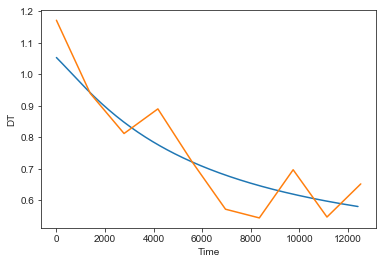

901
902
903
904
905
906
907
908
909
910


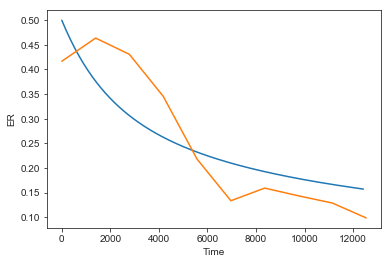

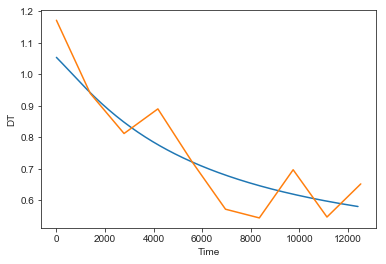

911
912
913
914
915
916
917
918
919
920


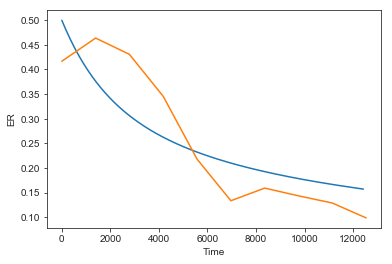

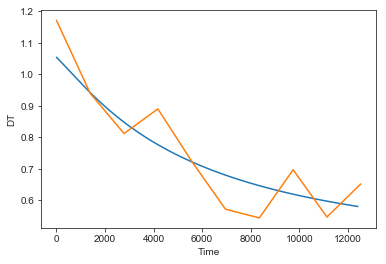

921
922
923
924
925
926
927
928
929
930


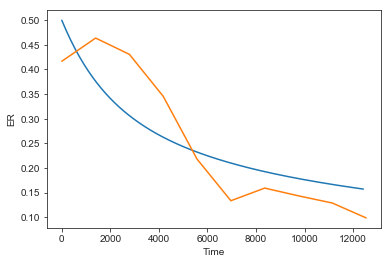

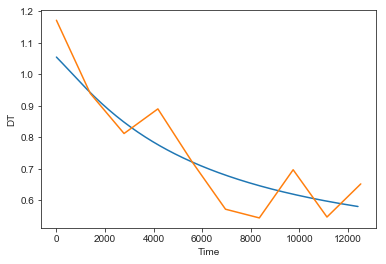

931
932
933
934
935
936
937
938
939
940


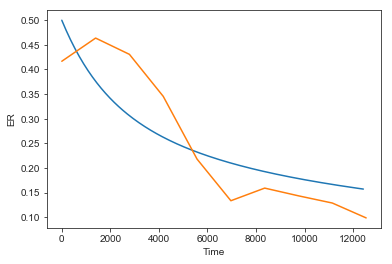

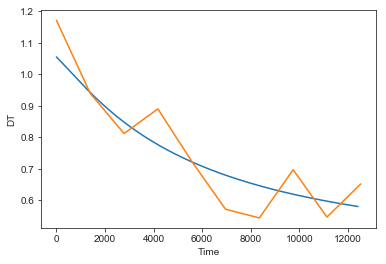

941
942
943
944
945
946
947
948
949
950


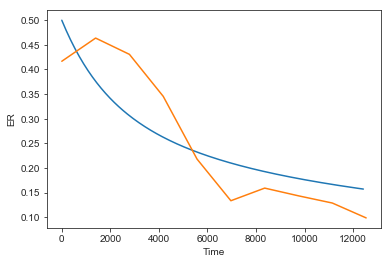

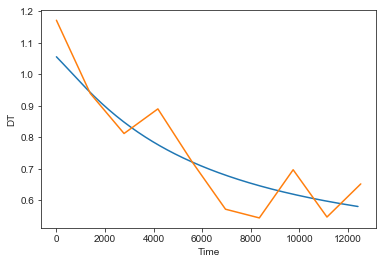

951
952
953
954
955
956
957
958
959
960


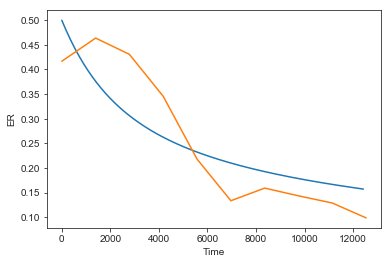

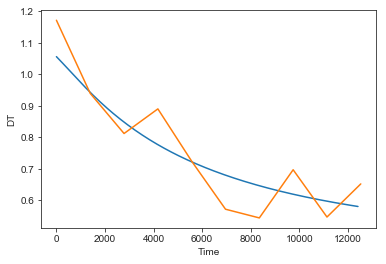

961
962
963
964
965
966
967
968
969
970


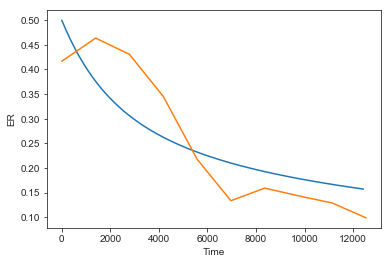

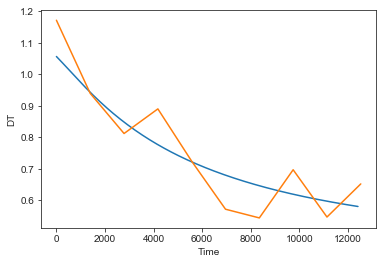

971
972
973
974
975
976
977
978
979
980


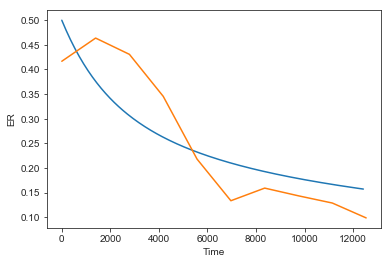

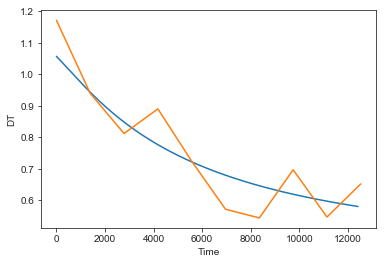

981
982
983
984
985
986
987
988
989
990


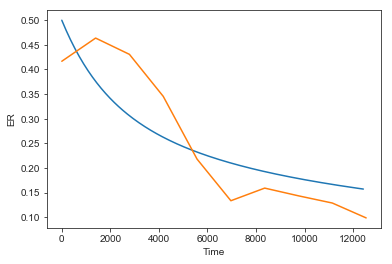

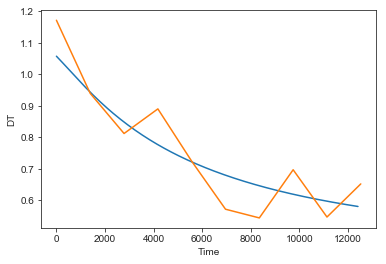

991
992
993
994
995
996
997
998
999


In [28]:
# Try fit with new dynamics model that matches simulation
numpify = lambda x: np.vstack([t.data.numpy() for t in x])

# Hyperparameters to be inferred (probably some are redundant at present)
A =  Variable(1.0249*torch.ones(1), requires_grad = True)
ci = Variable(0.5840*torch.ones(1), requires_grad = True)
co = Variable(30.0099*torch.ones(1), requires_grad = True)
w0 = Variable(.0001*torch.ones(1), requires_grad = True)
z0 = Variable(30*torch.ones(1), requires_grad = True)
lr = Variable(4.6147*torch.ones(1), requires_grad = True)
gamma = Variable(0.9833*torch.ones(1), requires_grad = True)
DT_target = Variable(0.7863*torch.ones(1), requires_grad = True)

T = 12536
dt = 60


Nsteps = int(np.round(T/dt))
time = np.arange(Nsteps)*dt



zbar= [Variable(torch.ones(1), requires_grad = False) for t in np.arange(Nsteps)]
SNR = [Variable(torch.zeros(1), requires_grad = False) for t in np.arange(Nsteps)]
ER  = [Variable(torch.zeros(1), requires_grad = False) for t in np.arange(Nsteps)]
DT  = [Variable(torch.zeros(1), requires_grad = False) for t in np.arange(Nsteps)]
TT  = [Variable(torch.zeros(1), requires_grad = False) for t in np.arange(Nsteps)]
RR  = [Variable(torch.zeros(1), requires_grad = False) for t in np.arange(Nsteps)]
w   = [Variable(w0*torch.ones(1), requires_grad = False) for t in np.arange(Nsteps)]
z   = [Variable(z0*torch.ones(1), requires_grad = False) for t in np.arange(Nsteps)]

optimizer = optim.SGD([A,ci,co,w0,z0,lr,gamma,DT_target], lr=.005, momentum=.9)

Nitr = 1000 # Number of optimization steps

Rtot_hist = np.zeros(Nitr)
ER_fit_hist = np.zeros(Nitr)
DT_fit_hist = np.zeros(Nitr)
cost_hist = np.zeros(Nitr)

for b in range(Nitr):
    print(b)
    optimizer.zero_grad()
    
    # Solve forward dynamics

    Rtot = 0
    for t in range(Nsteps):
        zbar[t] = z[t]/(A*w[t])
        SNR[t] =  A**2*w[t]**2/(ci**2*w[t]**2 + co**2)
        ER[t] = 1/(1 + torch.exp(2*zbar[t]*SNR[t]))
        DT[t] = zbar[t]*torch.tanh(zbar[t]*SNR[t])
        TT[t] = DT[t] + D + T0 + Dp*ER[t]
        RR[t] = (1-ER[t])/TT[t]
        Rtot =  Rtot + RR[t]*dt
        if t < Nsteps-1:
            w[t+1] = w[t] + lr/100.*ER[t]*( (A*DT[t]) + 1./(1+co**2/(w[t]**2*ci**2))*(-z[t]/w[t] - A*DT[t]))/TT[t]*dt
            z[t+1] = z[t] + gamma/100.*(DT_target - DT[t])/TT[t]*dt
  
    # Plot trajectory over the data
    if b % 10 == 0:
        plt.plot(time,numpify(ER))
        plt.plot(sess*T,ER_dat)
        plt.xlabel('Time')
        plt.ylabel('ER')
        plt.show()

        plt.plot(time,numpify(DT))
        plt.plot(sess*T,DT_dat)
        plt.xlabel('Time')
        plt.ylabel('DT')
        plt.show()
    
    # Compute loss (quality of fit to the data)
    Rtot_hist[b] = Rtot.data.numpy()
    
    ER_fit = 0
    DT_fit = 0
    for i,s in enumerate(sess):
        ER_fit = ER_fit + (torch.Tensor([ER_dat[i]]) - ER[int(round(s*(T/dt-1)))])**2
        DT_fit = DT_fit + (torch.Tensor([DT_dat[i]]) - DT[int(round(s*(T/dt-1)))])**2
        
    cost = ER_fit + DT_fit
    
    ER_fit_hist[b] = ER_fit.data.numpy()
    DT_fit_hist[b] = DT_fit.data.numpy()
    cost_hist[b] = cost.data.numpy()
    
    cost.backward()
    optimizer.step()

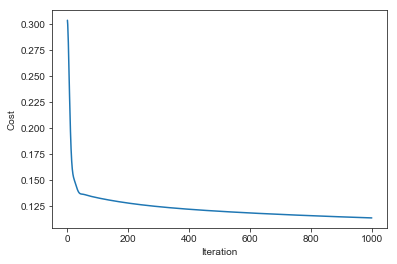

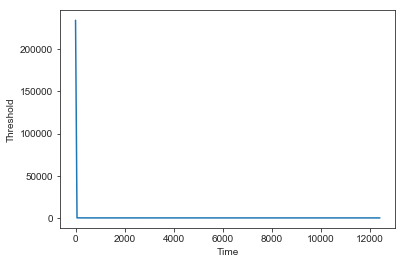

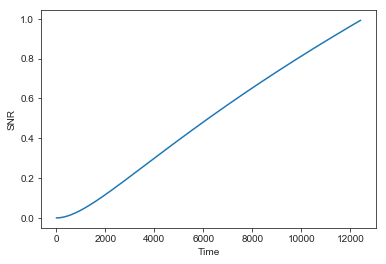

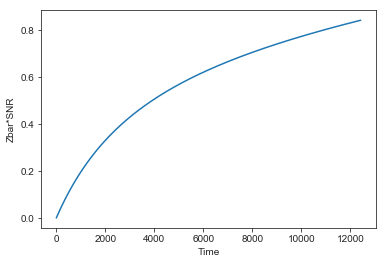

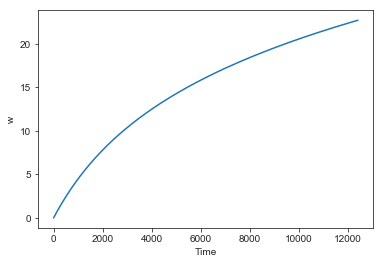

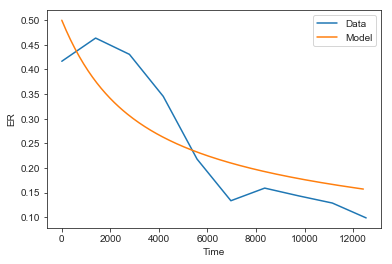

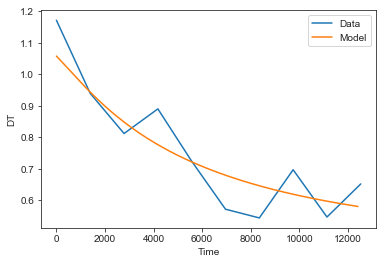

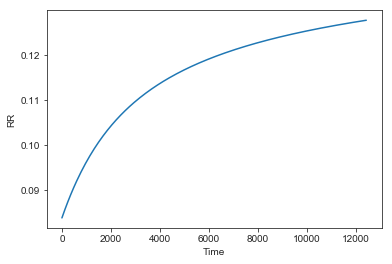

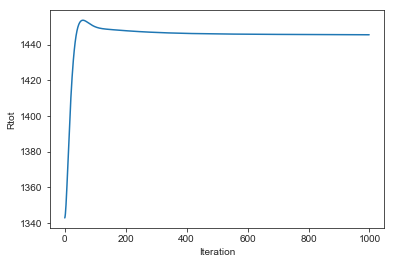

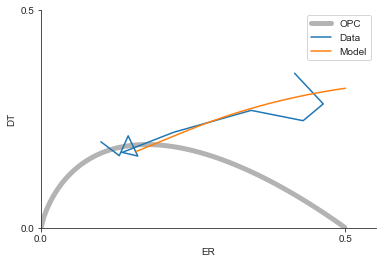

In [34]:
# Plot some results

plt.plot(cost_hist)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.show()

plt.plot(time,numpify(zbar))
plt.xlabel('Time')
plt.ylabel('Threshold')
plt.show()

plt.plot(time,numpify(SNR))
plt.xlabel('Time')
plt.ylabel('SNR')
plt.show()

plt.plot(time,numpify(zbar)*numpify(SNR))
plt.xlabel('Time')
plt.ylabel('Zbar*SNR')
plt.show()

plt.plot(time,numpify(w))
plt.xlabel('Time')
plt.ylabel('w')
plt.show()

plt.plot(sess*T,ER_dat,time,numpify(ER))
plt.xlabel('Time')
plt.ylabel('ER')
plt.legend(('Data','Model'))
plt.show()

plt.plot(sess*T,DT_dat,time,numpify(DT))
plt.xlabel('Time')
plt.ylabel('DT')
plt.legend(('Data','Model'))
plt.show()


plt.plot(time,numpify(RR))
plt.xlabel('Time')
plt.ylabel('RR')
plt.show()

plt.plot(Rtot_hist)
plt.xlabel('Iteration')
plt.ylabel('Rtot')
plt.show()

ERs = np.linspace(0.00001,.499,100)
Dnorm_opc = 1./(1./( ERs*np.log( (1-ERs)/ERs ) ) + 1./ (1. - 2.*ERs) )
plt.plot(ERs,Dnorm_opc,color=(.7, .7, .7),linewidth=5)
plt.plot(ER_dat,DT_dat/(D+T0+Dp),numpify(ER),numpify(DT)/(D + T0+Dp))
plt.legend(('OPC','Data','Model'))

xmin = 0.0
xmax = 0.55
ymin = 0.0
ymax = 0.5
plt.axis([xmin, xmax, ymin, ymax])
plt.xlabel('ER')
plt.ylabel('DT')
plt.xticks([0, 0.5])
plt.yticks([0, 0.5])
sns.despine()
plt.savefig('AL14_modelfit_opc_during_learning.pdf')
plt.show()